In [1]:
import pandas as pd
import re
import numpy as np

In [3]:
import transformers
from transformers import pipeline

In [5]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [7]:
df = pd.read_csv('book_reviews_sample.csv')

In [9]:
df.head()

,index,reviewText,rating
0,11494,Clean and funny. A bit busy with all the diffe...,3
1,984,Alex a sexy hot cop and the PhD candidate. Wha...,4
2,1463,Good thing that this is a free story. I read i...,1
3,10342,"Action, action, action! Equipment keeps gettin...",4
4,5256,this was hands down the worse book i have ever...,1


In [11]:
df['reviewText'][0]

'Clean and funny. A bit busy with all the different plots going on. But overall a good read. Bye now.'

In [15]:
df['reviewText_Clean'] = df.apply(lambda x: re.sub(r"([^\w\s])", "", x['reviewText']), axis=1)

In [17]:
df.head()

,index,reviewText,rating,reviewText_Clean
0,11494,Clean and funny. A bit busy with all the diffe...,3,Clean and funny A bit busy with all the differ...
1,984,Alex a sexy hot cop and the PhD candidate. Wha...,4,Alex a sexy hot cop and the PhD candidate What...
2,1463,Good thing that this is a free story. I read i...,1,Good thing that this is a free story I read it...
3,10342,"Action, action, action! Equipment keeps gettin...",4,Action action action Equipment keeps getting b...
4,5256,this was hands down the worse book i have ever...,1,this was hands down the worse book i have ever...


In [25]:
vader_sentiment = SentimentIntensityAnalyzer()

In [35]:
df['vader_sentiment_score'] = df['reviewText_Clean'].apply(lambda x: vader_sentiment.polarity_scores(x)['compound'])

In [37]:
df['vader_sentiment_score'][0]

0.7684

In [39]:
bins = [-1, -0.1, 0.1, 1]
names = ['negative', 'neutral', 'positive']
df['vader_sentiment_label'] = pd.cut(df['vader_sentiment_score'], bins, labels=names)

In [43]:
df.head()

,index,reviewText,rating,reviewText_Clean,vader_sentiment_score,vader_sentiment_label
0,11494,Clean and funny. A bit busy with all the diffe...,3,Clean and funny A bit busy with all the differ...,0.7684,positive
1,984,Alex a sexy hot cop and the PhD candidate. Wha...,4,Alex a sexy hot cop and the PhD candidate What...,0.9325,positive
2,1463,Good thing that this is a free story. I read i...,1,Good thing that this is a free story I read it...,0.6740,positive
3,10342,"Action, action, action! Equipment keeps gettin...",4,Action action action Equipment keeps getting b...,0.6652,positive
4,5256,this was hands down the worse book i have ever...,1,this was hands down the worse book i have ever...,-0.4767,negative


<Axes: xlabel='vader_sentiment_label'>

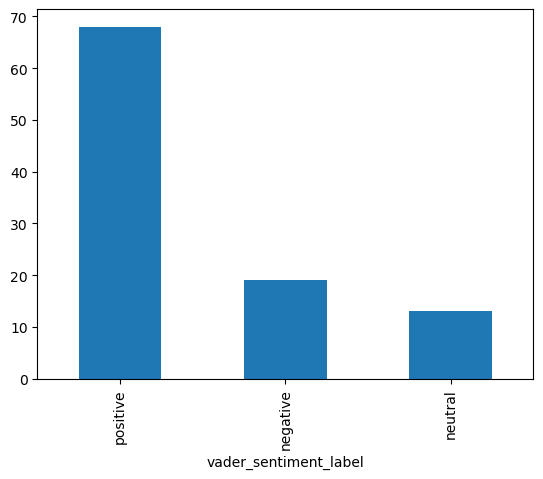

In [45]:
df['vader_sentiment_label'].value_counts().plot.bar()

In [47]:
transformer_pipeline = pipeline('sentiment-analysis')

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu


In [59]:
transformer_labels = []

In [61]:
for review in df['reviewText_Clean']:
    senti_list = transformer_pipeline(review)
    transformer_labels.append(senti_list[0]['label'])

In [62]:
print(transformer_labels)

['POSITIVE', 'POSITIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'NEGATIVE', 'POSITIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'POSITIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'NEGATIVE', 'POSITIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'NEGATIVE', 'POSITIVE', 'NEGATIVE', 'POSITIVE', 'NEGATIVE', 'POSITIVE', 'NEGATIVE', 'POSITIVE', 'NEGATIVE', 'POSITIVE', 'NEGATIVE', 'NEGATIVE', 'POSITIVE', 'NEGATIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'NEGATIVE', 'POSITIVE', 'POSITIVE', 'NEGATIVE', 'POSITIVE', 'NEGATIVE', 'POSITIVE', 'POSITIVE', 'NEGATIVE', 'NEGATIVE', 'POSITIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'POSITIVE', 'POSITIVE', 'NEGATIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'NEGATIVE', 'NEGATIVE', 'POSITIVE', 'NEGATIVE', 'POSITIVE', 'NEGATIVE', 'POSITIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'POSITIVE', 'NEGATIVE', 'POSITIVE', 'NEGATIVE', 'POSITIVE', 'NE

In [65]:
df['transformer_label'] = transformer_labels

<Axes: xlabel='transformer_label'>

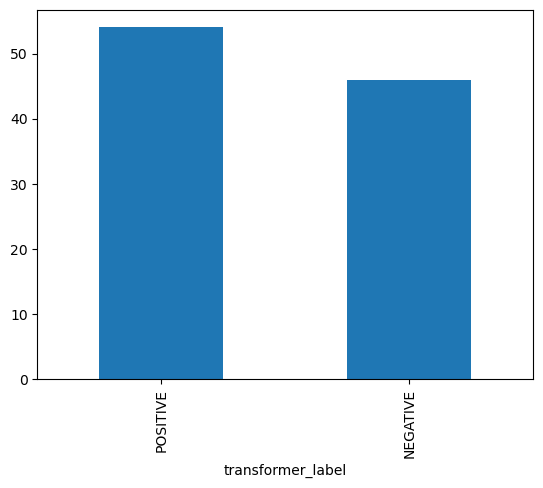

In [67]:
df['transformer_label'].value_counts().plot.bar()